<a href="https://colab.research.google.com/github/dubeyshubham786/Mobile-Price-Range-Prediction/blob/main/Copy_of_Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Prediction**

Predicting the price of mobile phone with the help of following mobile parameters like Battery Power, Camera, Size of the screen, Support 3G or 4G features, RAM, etc. 

First we will load the data and get familiar with the dataset. After that we will perform EDA on the dataset. 

## **Data Description**


**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are
Three_g - Has 3G or not

**Touch_screen** - Has touch screen or not
Wifi - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/PROJECTS/Resume Project/data_mobile_price_range_train.csv")
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Github/PROJECTS/Resume Project/mobile_price_range_test.csv')

In [ ]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


From the above data we can to know that the price range is what we have to find out. Basically price range is in the form of 0, 1, 2, 3 which means low cost, medium cost, high cost and very high cost. So it is the classification problem.

In [ ]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df_train.shape

(2000, 21)

In [ ]:
df_test.shape

(1000, 21)

In [ ]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
# Checking is there any null values present in the dataset

df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

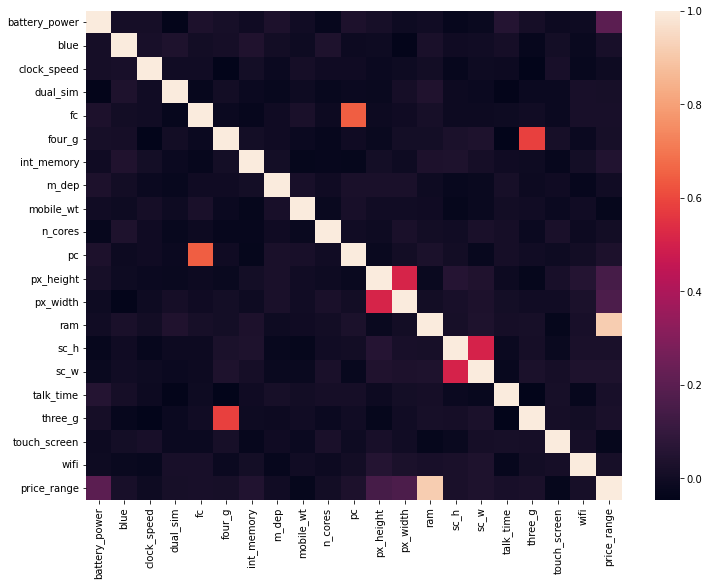

In [ ]:
# Now we will use heatmap to see how different parameter values are correlated to each other

plt.figure(figsize = (12, 9))
sns.heatmap(df_train.corr())
plt.show()

## Plotting Relation between Price Range and Battery Power

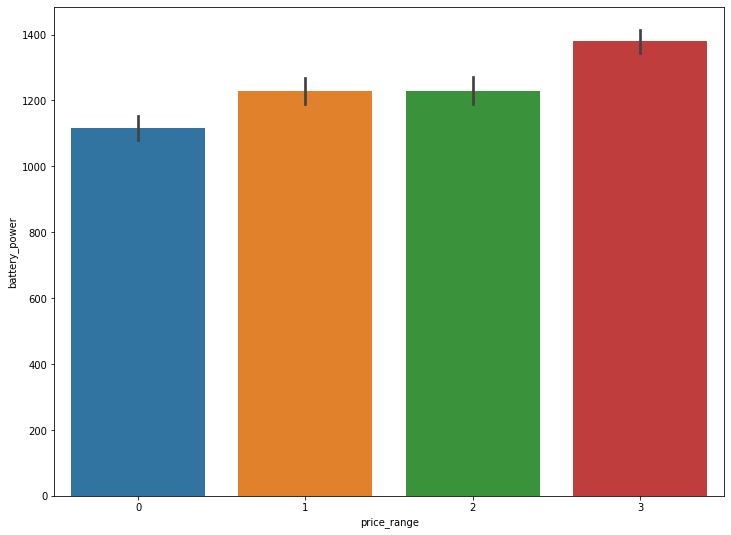

In [ ]:
# We will use bar plot because it gets easier to see the price of the mobile phones with the help of battery power

plt.figure(figsize = (12, 9))
sns.barplot(x='price_range', y = 'battery_power', data = df_train)
plt.show()

## Plotting Relation between Price Range and Pexel Height/Weight

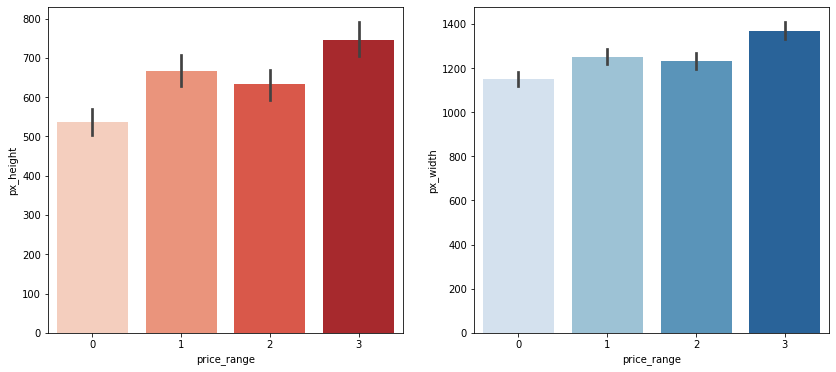

In [ ]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='price_range', y='px_height', data=df_train, palette='Reds')
plt.subplot(1, 2, 2)
sns.barplot(x='price_range', y='px_width', data=df_train, palette='Blues')
plt.show()

## Plotting relation between Price Range and Ram

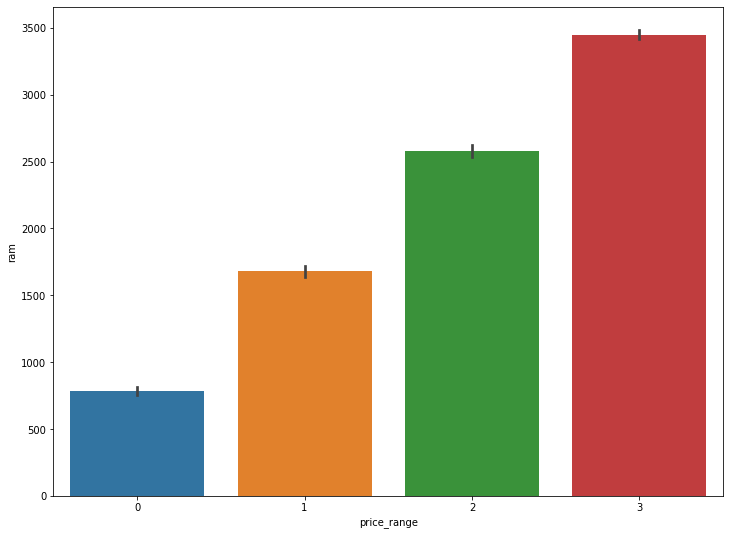

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = 'price_range', y = 'ram', data = df_train)
plt.show()

## Plotting relation between Price Range and 3G/4G

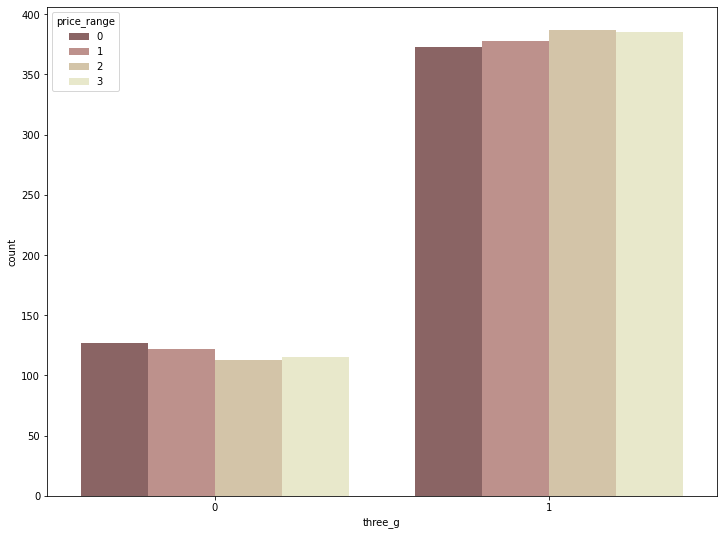

In [ ]:
plt.figure(figsize=(12, 9))
sns.countplot(df_train['three_g'], hue = df_train['price_range'], palette = 'pink')
plt.show()

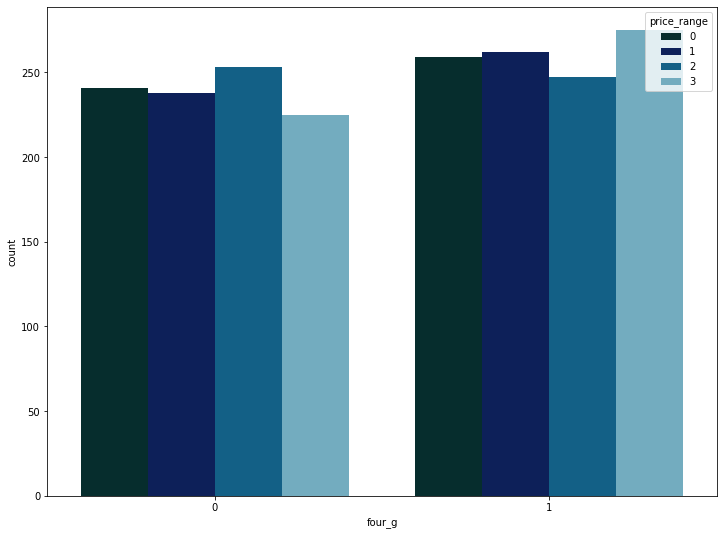

In [ ]:
# Now for 4G
plt.figure(figsize=(12, 9))
sns.countplot(df_train['four_g'], hue = df_train['price_range'], palette = 'ocean')
plt.show()

# Plotting relation between price range and memory

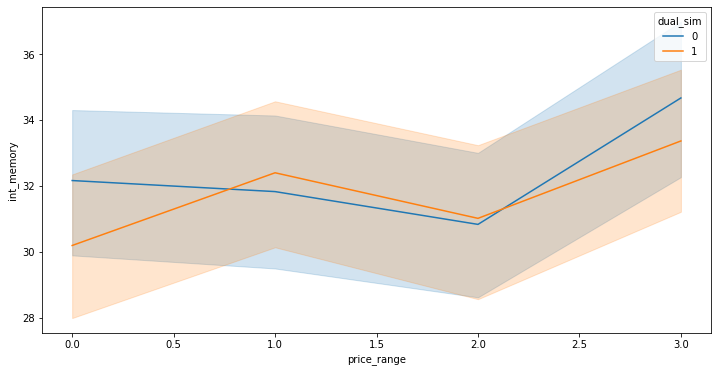

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='price_range', y = 'int_memory', data = df_train, hue = 'dual_sim')
plt.show()

# **Data Preprocessing**

In [ ]:
# Creating two variable X and Y
x = df_train.drop(['price_range'], axis = 1)
y = df_train['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(x_train, y_train)

0.9457142857142857

In [ ]:
predictions = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.935

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
logmodel.score(x_train,y_train)

0.6364285714285715

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.63

## **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(x_train, y_train)

1.0

This shows that our model over fits the training data

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8466666666666667

## **The KNN model performs best and has the maximum accuracy of 93.5 %**